# Neural Network Models

Neural networks are a model type which exploded in popularity since [AlexNet](https://en.wikipedia.org/wiki/AlexNet) in 2013 broke records in computer vision. 

To start, a simple example is possible through `sklearn` which supports the simplest type of neural network, [Multi-layer Perceptrons](https://en.wikipedia.org/wiki/Multilayer_perceptron) AKA "vanilla" neural networks:

accuracy_score 0.9591774891774891


Text(89.18, 0.5, 'predicted label')

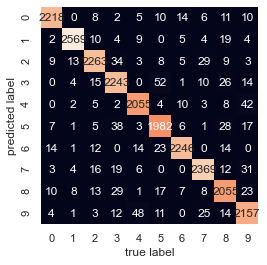

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import  train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
sns.set()

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


nn = MLPClassifier(
    hidden_layer_sizes=[50, 20, 10], 
    activation='relu', solver='adam', 
    alpha=0.0001, batch_size='auto', 
    learning_rate='constant', # adaptive
    learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
    random_state=None, tol=0.0001, verbose=False, warm_start=False, 
    momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
    n_iter_no_change=10, max_fun=15000)
nn.fit(X_train, y_train)

pred = nn.predict(X_test)

print(f"accuracy_score {accuracy_score(y_test, pred)}")

mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Neural Networks

Neural networks models were intially made as an attempt to model how the brain works. 

They ended up being succesful because they're an efficient way to leverage gradient descent onto whatever you want -- completely unrelated to brains (which turned out to work differently).

Neural networks have an **input layer** (a row in the X matrix), **hidden layers** (the model) and an **output layer** (the output of the model). If we're doing regression, the output is a real number. However, the output can really be whatever you want -- for classification it's a one-hot encoded vector.

![](dnn.png)

Each arrow in this graph has a multiplicative coefficient and an additive coefficient, like in a linear regression (in neural network parlance, a *weight* and a *bias*).

**Linear models are a special case**

In a sense, you can see linear regression as a special case of a neural network, where the input layer is fed directly to the output layer.

**Activation Functions**

Though nowadays, most people set the activation to be ReLu and forget about it, there once was a distant time (in 2015) where this was not settled. Each "neuron" (connection point between two layers) can support an "activation function" which modulates the value being passed to the next layer:

![](activations.png)

People used to use Sigmoid and Tanh activations more, nowadays people only use ReLu. This isn't particularly because there's a theoretical justification for it, they're just more stable in training and faster to compute.

**BackPropagation**

The way we apply gradient descent to neural networks is through **backpropagation**. After computing the difference between the output layer and the $y$ labels, we take this gradient and propagate it back through the layers and activation functions

![](backprop.png)


# Installation


Note that NNs are the first model type we see here that are truly compute intensive, and often require GPUs to get reasonable model training times.

Neural network libraries (Tensorflow, Torch, MXNet, Theano) are large and installation can be annoying. Always install in `conda` environment, and follow the installation guides on the library documentation site.

### Colab is your friend

If you have issues installing GPU (or don't have an NVIDIA GPU), you can always use Google Colab for Free which provides GPUs. You can also install the CPU version, which will be slower.

# Keras

Keras is the human-friendly, well designed API to Tensorflow (which has a horrible mess of an API).

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (None, 784)
batch_size = 128
epochs = 5

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# convert class vectors to one-hot class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# The actual neural net model
model = keras.Sequential(
    [
        # Input layer
        keras.Input(shape=input_shape),
        # Hidden layers
        layers.Dense(50, activation="relu"),
        layers.Dense(20, activation="relu"),
        layers.Dense(10, activation="relu"),
        # Note the output shape is the number of classes
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, None, 50)          39250     
_________________________________________________________________
dense_25 (Dense)             (None, None, 20)          1020      
_________________________________________________________________
dense_26 (Dense)             (None, None, 10)          210       
_________________________________________________________________
dense_27 (Dense)             (None, None, 10)          110       
Total params: 40,590
Trainable params: 40,590
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
330/330 [==============================] - 2s 3ms/step - loss: 1.2421 - accuracy: 0.5481 - val_loss: 0.5524 - val_accuracy: 0.8657
Epoch 2/10
330/330 [==============================] - 1s 2ms/step - loss: 1.2353 - accuracy: 0.5542 - val_loss: 0.5536 - val_accuracy: 0.8582
Epoch 3/10
330/330 [==============================] - 1s 2ms/step - loss: 1.2339 - accuracy: 0.5530 - val_loss: 0.5487 - val_accuracy: 0.8795
Epoch 4/10
330/330 [==============================] - 1s 2ms/step - loss: 1.2342 - accuracy: 0.5506 - val_loss: 0.5381 - val_accuracy: 0.8601
Epoch 5/10
330/330 [==============================] - 1s 2ms/step - loss: 1.2236 - accuracy: 0.5593 - val_loss: 0.5402 - val_accuracy: 0.8576
Epoch 6/10
330/330 [==============================] - 1s 2ms/step - loss: 1.2457 - accuracy: 0.5461 - val_loss: 0.5387 - val_accuracy: 0.8889
Epoch 7/10
330/330 [==============================] - 1s 2ms/step - loss: 1.2238 - accuracy: 0.5561 - val_loss: 0.5319 - val_accuracy: 0.8631
Epoch 

In [63]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5472908020019531
Test accuracy: 0.845324695110321


### Overfit

We see we have overfit to our training validation set.

# Types of models

A **Multi-Layer Perceptron** (MLP) is simply a neural network feeding inputs into outputs through only "dense" layers (fully connected layers).

A **Feed Forward Network** (FFNN) is a generalization of the MLP that uses some other types of layers (dropout, batchnorm, etc) to enhance performance.

An **AutoEncoder** maps $X$ back to itself with a smaller layer in the middle (which compresses the information). You can think of it as an *embedding* (eg. dimensionality reduction) technique.

For now we'll only focus on pure **feedforward** networks, we'll look at **sequence learning** (Recurrent Nets and Transformer Architectures) later on in the course.

This means we'll focus oon green and purple nodes in this chart:

![](architecture_types.png)

# Popular Layer types

### Dropout

Is similar in idea to bagging that we saw for random forests.

The `Dropout` layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by `1/(1 - rate)` such that the sum over all inputs is unchanged.

### BatchNorm

Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

This normalizes input data per-batch.

Batch Normalization allows us to use much higher learning rates and be less careful about initialization. It also acts as a regularizer, reducing the need for Dropout.

### Embedding Layer

Turns positive integers (indexes) into dense vectors of fixed size.

e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

This layer can only be used as the first layer in a model. It's used to automatically turn categorical data into dense vectors bypassing the need for one-hot encoding.

We won't need this one for image data.

### Batch Size

Is the SGD parameter. 

If the Batch size is the size of your dataset, then you're doing classical gradient descent rather than SGD. Often smaller batches can be *better* because they're noisier and hence escape local minima more easily.

Here we'll use the `model.add()` API to build a model:

In [66]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation

model = keras.Sequential()

# we can think of this chunk as the input layer
# Note the output of this layer is very large: 100 dimensions
model.add(Dense(100, input_dim=784))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# hidden layer    
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(100))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
# Note the output shape is the number of classes
model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation('softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_27 (Batc (None, 100)               400       
_________________________________________________________________
activation_22 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_28 (Batc (None, 100)               400       
_________________________________________________________________
activation_23 (Activation)   (None, 100)             

In [67]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/10
330/330 [==============================] - 2s 4ms/step - loss: 1.7459 - accuracy: 0.4344 - val_loss: 0.5248 - val_accuracy: 0.9100
Epoch 2/10
330/330 [==============================] - 1s 4ms/step - loss: 0.8288 - accuracy: 0.8037 - val_loss: 0.3408 - val_accuracy: 0.9281
Epoch 3/10
330/330 [==============================] - 1s 4ms/step - loss: 0.6146 - accuracy: 0.8555 - val_loss: 0.2604 - val_accuracy: 0.9390
Epoch 4/10
330/330 [==============================] - 1s 4ms/step - loss: 0.5060 - accuracy: 0.8761 - val_loss: 0.2108 - val_accuracy: 0.9507
Epoch 5/10
330/330 [==============================] - 1s 4ms/step - loss: 0.4436 - accuracy: 0.8899 - val_loss: 0.1941 - val_accuracy: 0.9499
Epoch 6/10
330/330 [==============================] - 1s 3ms/step - loss: 0.3957 - accuracy: 0.9019 - val_loss: 0.1621 - val_accuracy: 0.9580
Epoch 7/10
330/330 [==============================] - 1s 3ms/step - loss: 0.3586 - accuracy: 0.9094 - val_loss: 0.1476 - val_accuracy: 0.9614
Epoch 